# Resnet50

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!ls /content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2

acuraintegra	      chrysler300	 infinitig
acurarl		      chrysleraspen	 infinitiqx56
acuratl		      chryslercrossfire  isuzuascender
acuratsx	      chryslerpt	 jaguarxk
acurazdx	      chryslersebring	 jeepcompass
amgeneral	      chryslertown	 jeepgrand
astonmartin	      daewoonubira	 jeepliberty
audi100		      dodgecaliber	 jeeppatriot
audia5		      dodgecaravan	 jeepwrangler
audir8		      dodgechallenger	 lamborghiniaventador
audirs		      dodgecharger	 lamborghinidiablo
audis4		      dodgedakota	 lamborghinigallardo
audis5		      dodgedurango	 lamborghinireventon
audis6		      dodgejourney	 landrover
auditt		      dodgemagnum	 lincolntown
auditts		      dodgeram		 maybachlandaulet
audiv8		      dodgesprinter	 mazdatribute
bentleyarnage	      eagletalon	 mclarenmp4-12c
bentleycontinental    ferrari458	 mercedes-benz300-class
bentleymulsanne       ferraricalifornia  mercedes-benzc-class
bmw1		      ferrariff		 mercedes-benze-class
bmw3		      fiat500		 mercedes-benzs-class
bmw6		      

In [ ]:
image_size = (224, 224)
batch_size = 50
transform = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input, validation_split=0.2)

In [ ]:
train_ds = transform.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    subset="training", seed = 42,target_size=image_size,batch_size=batch_size
)
val_ds = transform.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    subset="validation", seed = 42,target_size=image_size,batch_size=batch_size
)

Found 10413 images belonging to 157 classes.
Found 2535 images belonging to 157 classes.


In [ ]:
train_ds

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

Base Resnet50 Model

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=True, input_tensor=inputs)

102973440/102967424 [==============================] - 3s 0us/step


In [ ]:
last_layer = base_model.layers[-2].output 
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
new_base_model = Model(inputs = inputs, outputs = out)

Limit the number of trainable layers

In [ ]:
for layer in new_base_model.layers[:-25]:
  layer.trainable = False

In [ ]:
new_base_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
new_base_model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode = 'min')

In [ ]:
history = new_base_model.fit_generator(generator = train_ds, epochs=50,  validation_data = val_ds,callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
209/209 [==============================] - 5970s 29s/step - loss: 2.9597 - accuracy: 0.3098 - val_loss: 3.1284 - val_accuracy: 0.2927
Epoch 2/50
209/209 [==============================] - 122s 582ms/step - loss: 1.0715 - accuracy: 0.6939 - val_loss: 2.0533 - val_accuracy: 0.4923
Epoch 3/50
209/209 [==============================] - 122s 583ms/step - loss: 0.4301 - accuracy: 0.8774 - val_loss: 1.4977 - val_accuracy: 0.5854
Epoch 4/50
209/209 [==============================] - 122s 585ms/step - loss: 0.1823 - accuracy: 0.9519 - val_loss: 1.5907 - val_accuracy: 0.6099
Epoch 5/50
209/209 [==============================] - 123s 586ms/step - loss: 0.1123 - accuracy: 0.9721 - val_loss: 1.3369 - val_accuracy: 0.6493
Epoch 6/50
209/209 [==============================] - 123s 589ms/step - loss: 0.0548 - accuracy: 0.9885 - val_loss: 1.2319 - val_accuracy: 0.6892
Epoch 7/50
209/209 [=============================

In [ ]:
new_base_model.save('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/resnet_50_brand_model_1') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/resnet_50_brand_model_1/assets


Plot Accuracy vs. Loss

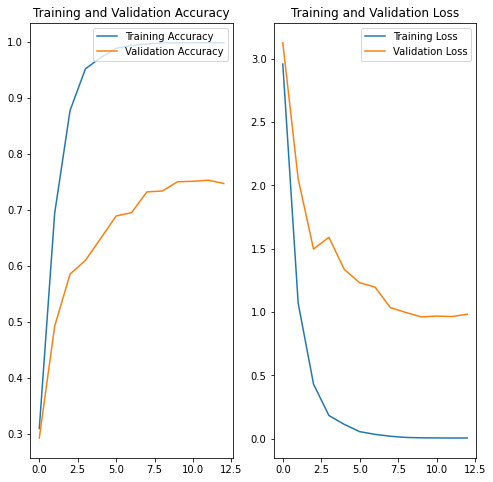

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
transform_test = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input)
test_ds = transform_test.flow_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2",
    seed = 42,target_size=image_size,batch_size=batch_size
)

Found 3237 images belonging to 157 classes.


Test Accuracy

In [ ]:
new_base_model.evaluate(test_ds)

65/65 [==============================] - 1640s 25s/step - loss: 0.9473 - accuracy: 0.7668


[0.9473158717155457, 0.7667593359947205]